
# Demo 2 - Segmentação de Consumidores via RFM e CLV (Machine Learning - ESPM)

### Prof. Dr. José Ahirton Lopes

### Machine learning para Análise de Campanha de Marketing

Ref. https://github.com/nailson/ifood-data-business-analyst-test

Ref. https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

Ref. O. Parr-Rud. Business Analytics Using SAS Enterprise Guide and SAS Enterprise Miner. SAS Institute, 2014.


1 - Problema de negócio

2 - Entendimento de dados

3 - Preparação dos dados

4 - Visualização

5 - Calculando as métricas RFM

6 - Calculando os scores de RFM

7 - Criando e analisando Segmentos RFM

8 - Customer Lifetime Value (CLTV)

In [1]:
import numpy as np # biblioteca algebrica do python
import pandas as pd # manipulacao de dados, I/O de arquivos csv (ex. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
from datetime import date
! pip install lifetimes
from lifetimes.plotting import *
from lifetimes.utils import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.5 MB/s eta 0:00:00


In [2]:
# Snippet de código para conexão com dados na máquina local e envio para ambiente do colab

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('Usuário fez upload do arquivo "{name}" com tamanho de {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving marketing_campaign.csv to marketing_campaign.csv
Usuário fez upload do arquivo "marketing_campaign.csv" com tamanho de 220189 bytes


In [3]:
df = pd.read_csv('marketing_campaign.csv',sep=";")
pd.set_option('display.max_columns', None) # visualizando o número máximo de colunas do dataset
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


# 1) Problema de negócio
<a id=business> </a>

### Contexto do problema

Um modelo de resposta pode proporcionar um impulso significativo a eficiencia de uma campnha de marketing, aumentando as respostas ou reduzindo despesas. O objetivo é então prever quem responderá a uma oferta de um produto ou serviço.

No cenário a seguir estaremos criando, de forma passo a passo em linguagem Python, uma análise de uma base de dados robusta, de modo criar uma segmentação de RFM e análise de Customer Lifetimevalue (CLTV).

O objetivo principal é encontrar quais os clientes mais significativos ou não em nossa base.



### Atributos da base de dados

AcceptedCmp1 - 1 se o cliente aceitou a oferta na 1a campanha, 0 do contrario

AcceptedCmp2 - 1 se o cliente aceitou a oferta na 2a campanha, 0 do contrario

AcceptedCmp3 - 1 se o cliente aceitou a oferta na 3a campanha, 0 do contrario

AcceptedCmp4 - 1 se o cliente aceitou a oferta na 4a campanha, 0 do contrario

AcceptedCmp5 - 1 se o cliente aceitou a oferta na 5a campanha, 0 do contrario

Response (variavel alvo / rótulo) - 1 se o cliente aceitou a oferta na ultima campanha, 0 do contrario

Complain - 1 se o cliente registrou reclamação nos últimos 2 anos

DtCustomer - data que o cliente foi cadastrado na base da empresa

Education - nivel de educacao do cliente

Marital - status matrimonial do cliente

Kidhome - numero de criancas pequenas no domicilio do cliente

Teenhome - numero de adolescentes no domicilio do clinete

Income - receita anual por domicilio

MntFishProducts - gastos com produtos pesca nos ultimos dois anos

MntMeatProducts - gatos com produtos carne nos ultimos dois anos

MntFruits - gasto com produtos do tipo frutas nos ultimos dois anos

MntSweetProducts - gasto com produtos doce nos ultimos dois anos

MntWines - gasto com vinhos nos ultimos dois anos

MntGoldProds - gasto em ouro nos ultimos dois anos

NumDealsPurchases - numero de compras feitas com desconto

NumCatalogPurchases - numero de compras feitas usando catalogo

NumStorePurchases - numero de compras feitas direto na loja

NumWebPurchases - numero de compras feitas via website

NumWebVisitsMonth - numero de visitas ao website do lojista no ultimo mes

Recency - numero de dias desde a ultima compra do cliente

# 2) Análise Exploratória de Dados (EDA)
<a id= dataund> </a>

In [4]:
def check_df(dataframe, head=5):
    print("##################### Formato #####################")
    print(dataframe.shape)
    print("##################### Tipos de dados (dtypes) #####################")
    print(dataframe.dtypes)
    print("##################### Cabeçalho #####################")
    print(dataframe.head())
    print("##################### Final do dataframe #####################")
    print(dataframe.tail())
    print("##################### Dados Faltantes (N/A) #####################")
    print(dataframe.isnull().sum())
    print("##################### Analise de Quartis #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [5]:
check_df(df)

##################### Formato #####################
(2240, 29)
##################### Tipos de dados (dtypes) #####################
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
R

In [6]:
def null_percent(Dataframe, col):
    return Dataframe[col].isnull().sum() * 100 / df[col].count()

for col in df.columns:
    print(col + " porcentagem de nulos da variavel:" + str(null_percent(df, col)))

    # Null value percent

ID porcentagem de nulos da variavel:0.0
Year_Birth porcentagem de nulos da variavel:0.0
Education porcentagem de nulos da variavel:0.0
Marital_Status porcentagem de nulos da variavel:0.0
Income porcentagem de nulos da variavel:1.0830324909747293
Kidhome porcentagem de nulos da variavel:0.0
Teenhome porcentagem de nulos da variavel:0.0
Dt_Customer porcentagem de nulos da variavel:0.0
Recency porcentagem de nulos da variavel:0.0
MntWines porcentagem de nulos da variavel:0.0
MntFruits porcentagem de nulos da variavel:0.0
MntMeatProducts porcentagem de nulos da variavel:0.0
MntFishProducts porcentagem de nulos da variavel:0.0
MntSweetProducts porcentagem de nulos da variavel:0.0
MntGoldProds porcentagem de nulos da variavel:0.0
NumDealsPurchases porcentagem de nulos da variavel:0.0
NumWebPurchases porcentagem de nulos da variavel:0.0
NumCatalogPurchases porcentagem de nulos da variavel:0.0
NumStorePurchases porcentagem de nulos da variavel:0.0
NumWebVisitsMonth porcentagem de nulos da vari

In [7]:
# Estamos tentando preencher a variavel "receita" (income) com o resultado estatístico.

df_income_median = df["Income"].median()

In [8]:
df["Income"].mean()

# Receita média é de 52247 dólares enquanto a mediana é de 51381 dólares.
# A distribuiçnao se apresneta mais a direita, com a possível presença de outliers.

52247.25135379061

In [9]:
df = df.fillna(df_income_median)

In [10]:
df.head()
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [11]:
check_df(df)

##################### Formato #####################
(2240, 29)
##################### Tipos de dados (dtypes) #####################
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
R

De acordo com os dados, via a função info, nós temos 3 variáveis categóricas e 23 numéricas.

# 3) Preparação dos dados
<a id=dataprep> </a>

In [12]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2240.0,52237.975446,25037.955891,1730.0,35538.75,51381.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


Os dados de iadde dos clientes foram criados como uma variavel em separado, de modo a entenbder melhor os hábitos de consumo, como mencionado em aula. Para criarmos as métricas RFM temos de fazer a inferêbncia a partir de alguma variável.

In [14]:
df["Dt_Customer"].max()

'2014-06-29'

In [15]:
# devemos converter "Dt_Customer" de tipo objet para datetime

df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [17]:
today_date = df["Dt_Customer"].max()
today_date

Timestamp('2014-06-29 00:00:00')

In [18]:
# Vamos detectar a idade de nosso cliente
df["year_date"] = today_date.year

In [19]:
df["Age"] = df["year_date"] - df["Year_Birth"]

In [20]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,year_date,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2014,57
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014,60
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2014,49
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014,30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014,33


In [21]:
# Segmentaçnao de modo a analisar a nossa variável de idade
df["Age"] = pd.qcut(df['Age'].rank(method="first"), 3, labels=["Young", "MiddleAge", "Elder"])

In [22]:
# Removendo variáveis irrelevantes para o restante do processo
df.drop(['Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth'], axis=1, inplace=True)

In [23]:
df["Marital_Status"].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [24]:
# Segmentaçao para que possamos visualizar a variável de status matrimonial
df["Marital_Status"] = df["Marital_Status"].replace({"Married": "Together",
                                                     "Absurd": "Single",
                                                     "Together": "Together",
                                                     "Single": "Single",
                                                     "Divorced": "Single",
                                                     "Widow": "Single",
                                                     "Alone": "Single",
                                                     "YOLO": "Single"})

# 4) Visualização de dados
<a id=datavis> </a>

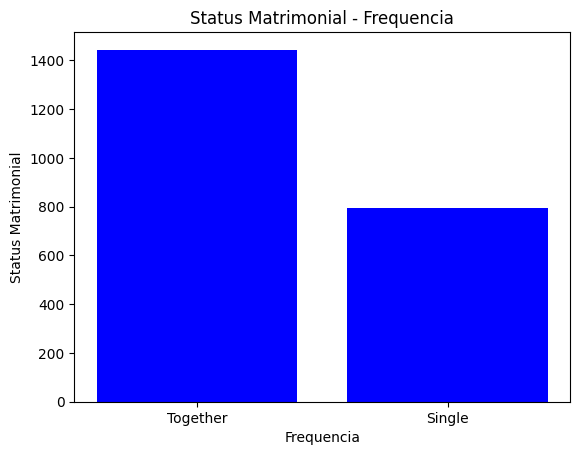

Numero de amostras de acordo com status matrimonial 
Together    1444
Single       796
Name: Marital_Status, dtype: int64


In [25]:
plt.figure()
plt.bar(df["Marital_Status"].value_counts().index, df["Marital_Status"].value_counts(), color = "b")
plt.xlabel("Frequencia")
plt.ylabel("Status Matrimonial")
plt.title("Status Matrimonial - Frequencia")
plt.show()
print(f"Numero de amostras de acordo com status matrimonial \n{df['Marital_Status'].value_counts()}")

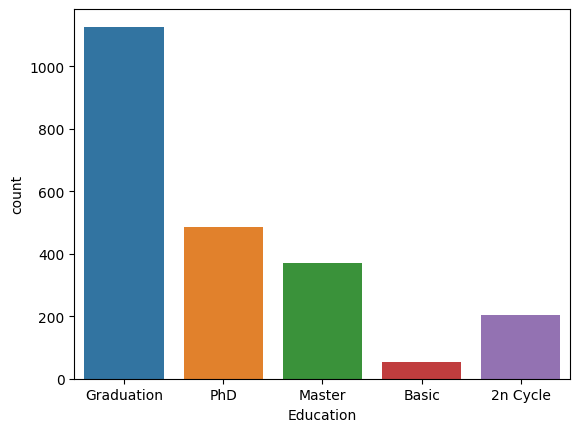

Numero de amostras de acordo com a Educação 
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


In [26]:
sns.countplot(x="Education", data=df)
plt.xticks(rotation = 0)
plt.show()
print(f"Numero de amostras de acordo com a Educação \n{df['Education'].value_counts()}")

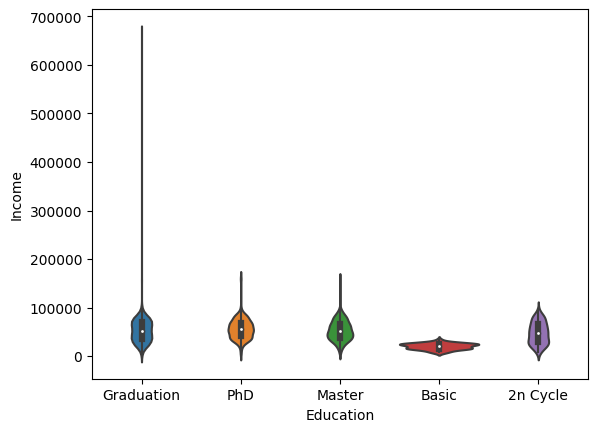

In [27]:
sns.violinplot(x="Education", y="Income", data=df)
plt.show()

# 5) Calculando Metricas RFM
<a id=rfm> </a>

In [28]:
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,year_date,Age
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2014,Elder
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014,Elder
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2014,MiddleAge
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014,Young
4,5324,PhD,Together,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014,Young


In [29]:
# Temos Recency. Foco agora em Monetary e Frequency.
df["Spending"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

In [30]:
# Para encontrar Frequency.
df["Frequency"] = df["NumDealsPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"] + df["NumWebPurchases"]

In [31]:
df_rfm = df.groupby("ID").agg({"Recency": "sum",
                     "Frequency": "sum",
                     "Spending": "sum"})

In [32]:
df_rfm.sort_values("Recency", ascending=False).reset_index()

,ID,Recency,Frequency,Spending
0,1743,99,11,801
1,7212,99,6,65
2,8595,99,7,67
3,7947,99,5,37
4,7829,99,6,65
...,...,...,...,...
2235,1991,0,7,96
2236,2285,0,15,335
2237,4047,0,20,544
2238,10476,0,11,251


In [33]:
df_rfm.columns = ['recency', 'frequency', 'monetary']

In [34]:
df_rfm.head()

,recency,frequency,monetary
ID,,,
0,66,17,1198
1,0,18,577
9,86,11,120
13,57,6,32
17,81,28,1028


In [35]:
df_rfm.describe().T
# A distribuição de dados agora está balanceada

,count,mean,std,min,25%,50%,75%,max
recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.0,99.0
frequency,2240.0,14.862054,7.677173,0.0,8.00,15.0,21.0,44.0
monetary,2240.0,605.798214,602.249288,5.0,68.75,396.0,1045.5,2525.0


In [36]:
df_rfm.shape

(2240, 3)

> We should determine RF score to segment our data.

# 6) Calculando os Scores RFM
<a id=rfmscore> </a>

In [37]:
df_rfm["recency_score"] = pd.qcut(df_rfm["recency"], 5, labels=[5,4,3,2,1])
df_rfm["frequency_score"] = pd.qcut(df_rfm["frequency"], 5, labels=[1,2,3,4,5])
df_rfm["monetary_score"] = pd.qcut(df_rfm["monetary"], 5, labels=[1,2,3,4,5])

In [38]:
df_rfm["RF_SCORE"] = (df_rfm["recency_score"].astype(str) + df_rfm["frequency_score"].astype(str))

In [39]:
df_rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE
ID,,,,,,,
0,66,17,1198,2,3,5,23
1,0,18,577,5,4,3,54
9,86,11,120,1,2,2,12
13,57,6,32,3,1,1,31
17,81,28,1028,1,5,4,15


In [40]:
df_rfm[df_rfm["RF_SCORE"] == '55']

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE
ID,,,,,,,
380,17,29,1804,5,5,5,55
535,18,27,778,5,5,4,55
760,8,23,811,5,5,4,55
796,17,26,1071,5,5,4,55
873,3,28,1178,5,5,5,55
...,...,...,...,...,...,...,...
10681,13,26,889,5,5,4,55
10814,6,25,1376,5,5,5,55
10968,0,26,704,5,5,4,55


# 7) Criando e analisando os segmentos RFM
<a id=rfmsegments> </a>

In [41]:
seg_map = {
    r'[1-2][1-2]': 'hibernando',
    r'[1-2][3-4]': 'em_risco',
    r'[1-2]5': 'nao_podemos_perder',
    r'3[1-2]': 'prestes_a_hibernar',
    r'33': 'necessita_atencao',
    r'[3-4][4-5]': 'clientes_leais',
    r'41': 'promissores',
    r'51': 'novos_clientes',
    r'[4-5][2-3]': 'leais_em_potencial',
    r'5[4-5]': 'campeoes'
}

In [42]:
df_rfm['segment'] = df_rfm['RF_SCORE'].replace(seg_map, regex=True)
df_rfm

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment
ID,,,,,,,,
0,66,17,1198,2,3,5,23,em_risco
1,0,18,577,5,4,3,54,campeoes
9,86,11,120,1,2,2,12,hibernando
13,57,6,32,3,1,1,31,prestes_a_hibernar
17,81,28,1028,1,5,4,15,nao_podemos_perder
...,...,...,...,...,...,...,...,...
11178,69,5,32,2,1,1,21,hibernando
11181,85,0,8,1,1,1,11,hibernando
11187,23,9,69,4,2,2,42,leais_em_potencial


In [43]:
df_rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])

recency        frequency           monetary      
                         mean count       mean count         mean count
segment                                                                
campeoes             9.194118   170  22.905882   170  1062.176471   170
clientes_leais      39.900850   353  23.178470   353  1115.923513   353
em_risco            78.586842   380  17.465789   380   877.692105   380
hibernando          80.162319   345   7.031884   345    83.857971   345
leais_em_potencial  19.014837   337  12.646884   337   438.142433   337
nao_podemos_perder  80.062893   159  25.981132   159  1205.918239   159
necessita_atencao   50.116279    86  14.953488    86   657.779070    86
novos_clientes       9.491525   118   5.381356   118    47.703390   118
prestes_a_hibernar  49.377049   183   6.852459   183    77.338798   183
promissores         29.669725   109   5.357798   109    39.422018   109

In [44]:
# Examinando os egmento de clientes que nao podemos perder
df_rfm[df_rfm["segment"] == "nao_podemos_perder"].head().count()

recency            5
frequency          5
monetary           5
recency_score      5
frequency_score    5
monetary_score     5
RF_SCORE           5
segment            5
dtype: int64

In [45]:
df_rfm[df_rfm["segment"] == "nao_podemos_perder"].index

Int64Index([   17,   217,   238,   500,   564,   610,   640,   716,   773,
              819,
            ...
            10413, 10584, 10590, 10678, 10701, 10770, 10897, 10925, 10992,
            11051],
           dtype='int64', name='ID', length=159)

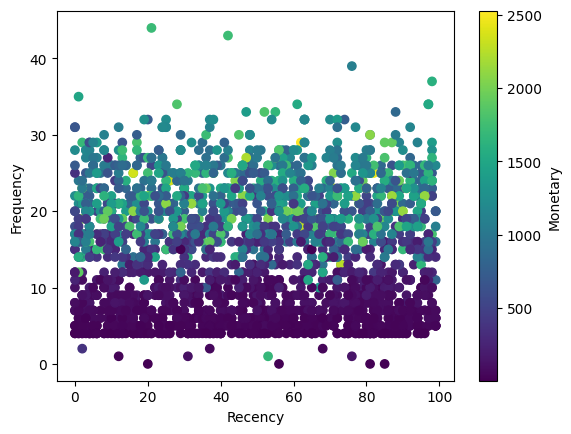

In [46]:
plt.scatter(df_rfm['recency'], df_rfm['frequency'], c=df_rfm['monetary'])
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.colorbar(label='Monetary')
plt.show()

In [47]:
df_rfm = df_rfm.reset_index()

In [48]:
df_segment = df_rfm.groupby('segment')['ID'].count().reset_index()
df_segment

,segment,ID
0,campeoes,170
1,clientes_leais,353
2,em_risco,380
3,hibernando,345
4,leais_em_potencial,337
5,nao_podemos_perder,159
6,necessita_atencao,86
7,novos_clientes,118
8,prestes_a_hibernar,183
9,promissores,109


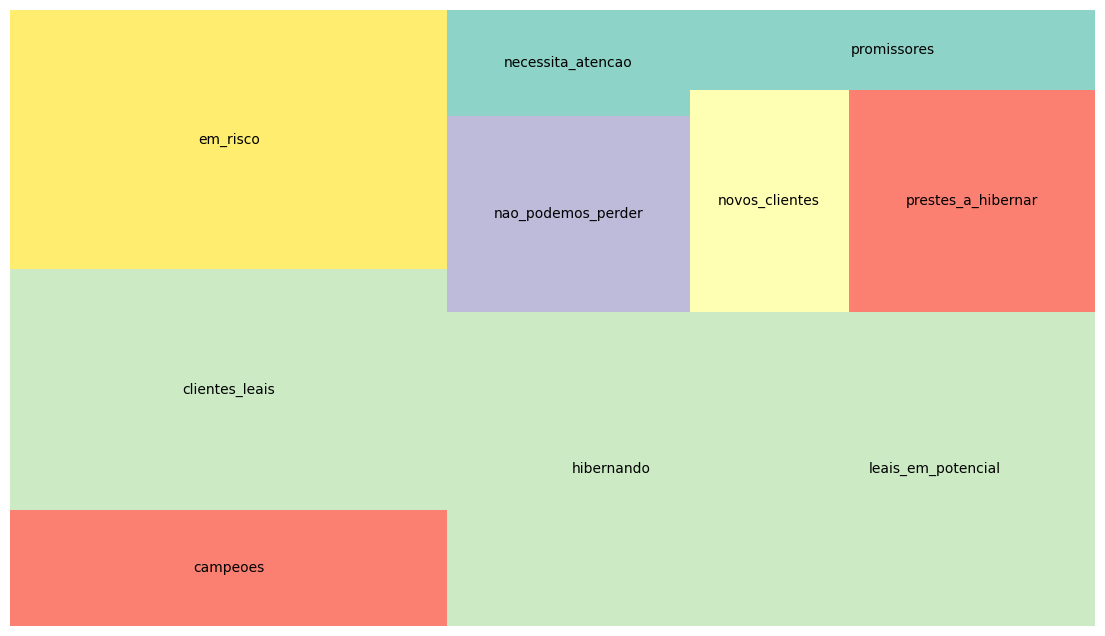

In [49]:
!pip install squarify

import squarify
import matplotlib.colors as mcolors
cmap = plt.cm.Set3
mini = min(df_segment['ID'])
maxi = max(df_segment['ID'])
norm = mcolors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in df_segment['ID']]
fig = plt.gcf()
fig.set_size_inches(14, 8)
squarify.plot(sizes=df_segment['ID'],
              label=df_segment['segment'], alpha=1, color=colors)
plt.axis("off")
plt.show()

# 8) Customer Life Time Value (CLTV)
<a id=cltv> </a>

In [50]:
df_rfm.head()

,ID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment
0,0,66,17,1198,2,3,5,23,em_risco
1,1,0,18,577,5,4,3,54,campeoes
2,9,86,11,120,1,2,2,12,hibernando
3,13,57,6,32,3,1,1,31,prestes_a_hibernar
4,17,81,28,1028,1,5,4,15,nao_podemos_perder


## **Passos para calculo do valor de CLTV**

#### 1) Média do valor da compra (average_order_value = total_price / total_transaction)
#### 2) Frequencia de compra (total_transaction / total_number_of_customers)
#### 3) Taxa de repticao e churn
#### 4) Margem de lucro (profit_margin =  total_price * 0.10)
#### 5) Valor do cliente (customer_value = average_order_value * purchase_frequency)
#### 6) Customer Lifetime Value (CLTV = (customer_value / churn_rate) x profit_margin)
#### 7) Criacao de segmentos

In [51]:
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,year_date,Age,Spending,Frequency
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2014,Elder,1617,25
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014,Elder,27,6
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2014,MiddleAge,776,21
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014,Young,53,8
4,5324,PhD,Together,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014,Young,422,19


In [52]:
df["Invoice"] = df["NumCatalogPurchases"] + df["NumStorePurchases"] + df["NumWebPurchases"]

In [53]:
df_cltv = df.groupby('ID').agg({'Invoice': lambda x: x.sum(),
                                        'Frequency': lambda x: x.sum(),
                                        'Spending': lambda x: x.sum()})

In [54]:
df_cltv.columns = ['total_transaction', 'total_unit', 'total_price']

In [55]:
df_cltv.head()

,total_transaction,total_unit,total_price
ID,,,
0,16,17,1198
1,17,18,577
9,7,11,120
13,4,6,32
17,24,28,1028


In [56]:
df_cltv.sort_values("total_price", ascending=False)

,total_transaction,total_unit,total_price
ID,,,
5350,17,18,2525
5735,17,18,2525
1763,28,29,2524
4580,25,26,2486
4475,24,25,2440
...,...,...,...
11181,0,0,8
5824,3,4,8
3955,0,0,6


#### 1) Média de valor da compra (average_order_value = total_price / total_transaction)

In [57]:
df_cltv["average_order_value"] = df_cltv["total_price"] / df_cltv["total_transaction"]

#### 2) Frequencia de compra (total_transaction / total_number_of_customers)

In [58]:
df_cltv["purchase_frequency"] = df_cltv["total_transaction"] / df_cltv.shape[0]

#### 3) Taxa de reptição e churn

In [59]:
repeat_rate = df_cltv[df_cltv["total_transaction"] > 1].shape[0] / df_cltv.shape[0]
churn_rate = 1 - repeat_rate

#### 4) Margem de lucro (profit_margin =  total_price * 0.10)

In [60]:
df_cltv["profit_margin"] = df_cltv["total_price"] * 0.10

#### 5) Valor do cliente (customer_value = average_order_value * purchase_frequency)

In [61]:
df_cltv["customer_value"] = df_cltv["average_order_value"] * df_cltv["purchase_frequency"]

#### 6) Customer Lifetime Value (CLTV = (customer_value / churn_rate) x profit_margin)

In [62]:
df_cltv["cltv"] = (df_cltv["customer_value"] / churn_rate) * df_cltv["profit_margin"]

In [63]:
df_cltv.sort_values(by="cltv", ascending=False)

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,profit_margin,customer_value,cltv
ID,,,,,,,,
5350,17,18,2525,148.529412,0.007589,252.5,1.127232,53130.208333
5735,17,18,2525,148.529412,0.007589,252.5,1.127232,53130.208333
1763,28,29,2524,90.142857,0.012500,252.4,1.126786,53088.133333
4580,25,26,2486,99.440000,0.011161,248.6,1.109821,51501.633333
4475,24,25,2440,101.666667,0.010714,244.0,1.089286,49613.333333
...,...,...,...,...,...,...,...,...
5555,0,0,6,inf,0.000000,0.6,NaN,NaN
6862,0,15,8,inf,0.000000,0.8,NaN,NaN
9931,0,15,9,inf,0.000000,0.9,NaN,NaN


#### 7) Criando os segmentos

In [64]:
df_cltv["segment"] =pd.qcut(df_cltv["cltv"], 4, labels = ["D", "C", "B", "A"])

In [65]:
df_cltv.sort_values(by="cltv", ascending=False)

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,profit_margin,customer_value,cltv,segment
ID,,,,,,,,,
5350,17,18,2525,148.529412,0.007589,252.5,1.127232,53130.208333,A
5735,17,18,2525,148.529412,0.007589,252.5,1.127232,53130.208333,A
1763,28,29,2524,90.142857,0.012500,252.4,1.126786,53088.133333,A
4580,25,26,2486,99.440000,0.011161,248.6,1.109821,51501.633333,A
4475,24,25,2440,101.666667,0.010714,244.0,1.089286,49613.333333,A
...,...,...,...,...,...,...,...,...,...
5555,0,0,6,inf,0.000000,0.6,NaN,NaN,NaN
6862,0,15,8,inf,0.000000,0.8,NaN,NaN,NaN
9931,0,15,9,inf,0.000000,0.9,NaN,NaN,NaN


In [66]:
df_cltv = df_cltv.dropna()

In [67]:
df_cltv.sort_values(by="cltv", ascending=False)

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,profit_margin,customer_value,cltv,segment
ID,,,,,,,,,
5350,17,18,2525,148.529412,0.007589,252.5,1.127232,53130.208333,A
5735,17,18,2525,148.529412,0.007589,252.5,1.127232,53130.208333,A
1763,28,29,2524,90.142857,0.012500,252.4,1.126786,53088.133333,A
4580,25,26,2486,99.440000,0.011161,248.6,1.109821,51501.633333,A
4475,24,25,2440,101.666667,0.010714,244.0,1.089286,49613.333333,A
...,...,...,...,...,...,...,...,...,...
6528,3,4,10,3.333333,0.001339,1.0,0.004464,0.833333,D
7788,3,4,10,3.333333,0.001339,1.0,0.004464,0.833333,D
8566,3,4,9,3.000000,0.001339,0.9,0.004018,0.675000,D


In [68]:
df_cltv.groupby("segment").agg({"count", "mean", "sum"})

total_transaction              total_unit               total_price  \
                     mean count    sum       mean count    sum         mean   
segment                                                                       
D                4.380107   563   2466   5.996448   563   3376    40.081705   
C                8.336937   555   4627  11.014414   555   6113   187.596396   
B               17.610413   557   9809  20.739677   557  11552   712.109515   
A               20.001789   559  11181  21.860465   559  12220  1491.268336   

                      average_order_value                      \
        count     sum                mean count           sum   
segment                                                         
D         563   22566            9.051806   563   5096.166667   
C         555  104116           22.063714   555  12245.361126   
B         557  396645           41.040313   557  22859.454331   
A         559  833619           80.770708   559  45150.825687   

        purchase_frequency                 profit_margin                 \
                      mean count       sum          mean count      sum   
segment                                                                   
D                 0.001955   563  1.100893      4.008171   563   2256.6   
C                 0.003722   555  2.065625     18.759640   555  10411.6   
B                 0.007862   557  4.379018     71.210952   557  39664.5   
A                 0.008929   559  4.991518    149.126834   559  83361.9   

        customer_value                            cltv                      
                  mean count         sum          mean count           sum  
segment                                                                     
D             0.017894   563   10.074107     15.633748   563  8.801800e+03  
C             0.083748   555   46.480357    371.200120   555  2.060161e+05  
B             0.317906   557  177.073661   4560.197801   557  2.540030e+06  
A             0.665745   559  372.151339  19433.117934   559  1.086311e+07